## Feature Engineering
Name: Ashwin Verma

### What Features Are You Looking For?
Nearest Defender to Each Receiver at the Snap Feature

### Why this Feature?
Knowing how far defenders are to the receiver will help to understand which defenses have worse coverage based on distance.
More distance would mean worse coverage

### Perform Feature Engineering to Find Features

### What Did You Find?

### Next Steps


In [204]:
import pandas as pd

In [ ]:
movement_data= pd.read_csv('tracking_week_2.csv')

In [206]:
movement_data= movement_data[(movement_data['gameId']==2022091901) & (movement_data['playId']==64) & (movement_data['frameType']=='SNAP')]
movement_data.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
131,2022091901,64,37078.0,Patrick Peterson,132,SNAP,2022-09-20 00:32:16.4,7.0,MIN,right,36.16,11.35,0.25,0.67,0.03,304.70,102.79,ball_snap
318,2022091901,64,37266.0,Jason Kelce,132,SNAP,2022-09-20 00:32:16.4,62.0,PHI,right,26.61,29.65,1.29,2.00,0.13,76.81,256.68,ball_snap
505,2022091901,64,38559.0,Harrison Smith,132,SNAP,2022-09-20 00:32:16.4,22.0,MIN,right,40.99,39.21,0.23,0.21,0.04,276.93,328.12,ball_snap
692,2022091901,64,39950.0,Lane Johnson,132,SNAP,2022-09-20 00:32:16.4,65.0,PHI,right,25.31,26.09,2.49,1.17,0.26,99.24,244.07,ball_snap
879,2022091901,64,42388.0,Eric Kendricks,132,SNAP,2022-09-20 00:32:16.4,54.0,MIN,right,32.07,25.24,0.05,0.69,0.01,269.06,128.98,ball_snap


In [ ]:
players=pd.read_csv('players.csv')

In [208]:
players.head(4)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis


In [209]:
data= pd.merge(movement_data,players,how="left", on="nflId")
data.head(5)

,gameId,playId,nflId,displayName_x,frameId,frameType,time,jerseyNumber,club,playDirection,...,dis,o,dir,event,height,weight,birthDate,collegeName,position,displayName_y
0,2022091901,64,37078.0,Patrick Peterson,132,SNAP,2022-09-20 00:32:16.4,7.0,MIN,right,...,0.03,304.70,102.79,ball_snap,6-1,203.0,1990-07-11,Louisiana State,CB,Patrick Peterson
1,2022091901,64,37266.0,Jason Kelce,132,SNAP,2022-09-20 00:32:16.4,62.0,PHI,right,...,0.13,76.81,256.68,ball_snap,6-3,295.0,1987-11-05,Cincinnati,C,Jason Kelce
2,2022091901,64,38559.0,Harrison Smith,132,SNAP,2022-09-20 00:32:16.4,22.0,MIN,right,...,0.04,276.93,328.12,ball_snap,6-2,214.0,1989-02-02,Notre Dame,SS,Harrison Smith
3,2022091901,64,39950.0,Lane Johnson,132,SNAP,2022-09-20 00:32:16.4,65.0,PHI,right,...,0.26,99.24,244.07,ball_snap,6-6,317.0,1990-05-08,Oklahoma,T,Lane Johnson
4,2022091901,64,42388.0,Eric Kendricks,132,SNAP,2022-09-20 00:32:16.4,54.0,MIN,right,...,0.01,269.06,128.98,ball_snap,6-0,232.0,1992-02-29,UCLA,ILB,Eric Kendricks


In [210]:
data['nearest_defender_1']=0
data['nearest_defender_2']=0
data['neareset_defender_3']=0

In [96]:
data.head(1)

,gameId,playId,nflId,displayName_x,frameId,frameType,time,jerseyNumber,club,playDirection,...,event,height,weight,birthDate,collegeName,position,displayName_y,nearest_defender_1,nearest_defender_2,neareset_defender_3
0,2022091901,64,37078.0,Patrick Peterson,132,SNAP,2022-09-20 00:32:16.4,7.0,MIN,right,...,ball_snap,6-1,203.0,1990-07-11,Louisiana State,CB,Patrick Peterson,0,0,0


In [211]:
all_timeframes= data['time'].unique()
wide_recievers=data[data['position']=='WR']
wide_recievers=wide_recievers['displayName_x'].unique()

In [212]:
wide_recievers

array(['A.J. Brown', 'Quez Watkins', 'DeVonta Smith'], dtype=object)

In [213]:
all_timeframes

array(['2022-09-20 00:32:16.4'], dtype=object)

In [232]:
number=1
for wr in wide_recievers:
    min_distance, defensive_player= defender_distance_to_wr(wr, data)
    data[f'nearest_defender_{number}']= min_distance
    print(defensive_player)
    number+=1

Patrick Peterson
Patrick Peterson
Patrick Peterson


In [231]:
defense_positions=['CB','SS', 'ILB', 'OLB', 'DE', 'DT', 'FS', 'NT', 'LB', 'MLB', 'DB']
def defender_distance_to_wr(wide_reciever,data):
    wr_df= data[data["displayName_x"]==wide_reciever]
    wr_x_distance= wr_df.iloc[0,10]
    wr_y_distance= wr_df.iloc[0,11]
    
    min_distance=10000
    defensive_player= ""
    for index, row in data.iterrows():
        if row["position"] not in defense_positions:
            continue
        
        defender_distance_to_wr= (abs(row['x']-wr_x_distance)) + (abs(row['y']-wr_y_distance))
        if defender_distance_to_wr < min_distance:
            min_distance= defender_distance_to_wr
            defensive_player= row["displayName_x"]
        return min_distance, defensive_player 

In [230]:
data.iloc[0,11]

np.float64(11.35)

In [ ]:
%pip install matplotlib
import matplotlib.pyplot as plt

In [223]:
data['x']

0     36.160000
1     26.610000
2     40.990000
3     25.310000
4     32.070000
5     32.410000
6     27.730000
7     27.300000
8     26.380000
9     27.730000
10    26.920000
11    28.030000
12    25.110000
13    33.730000
14    26.850000
15    26.120000
16    22.410000
17    35.660000
18    26.360000
19    26.930000
20    26.450000
21    42.490000
22    27.280001
Name: x, dtype: float64

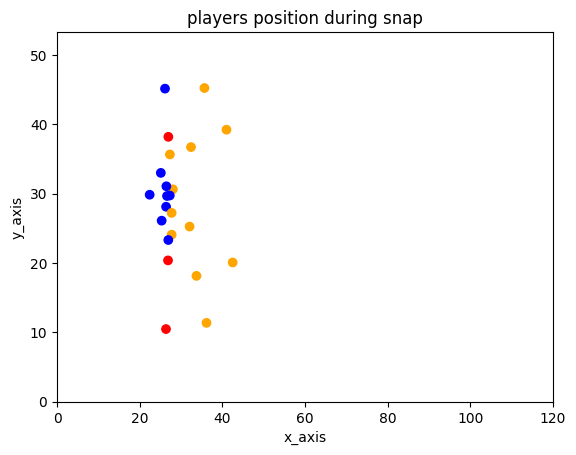

In [242]:
colors=['red' if position=="WR" else 'orange' if position in defense_positions else 'blue' for position in data['position']]
legend_labels = {'red': 'reciever', 'orange': 'defender', 'blue': 'others'}
plt.scatter(data['x'], data['y'], color=colors, marker='o')
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.xlim(0,120)
plt.ylim(0,53.3)
plt.title("players position during snap")
plt.show()